In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [4]:
test = pd.read_csv('titanic_test.csv')
train = pd.read_csv('titanic_train.csv')

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


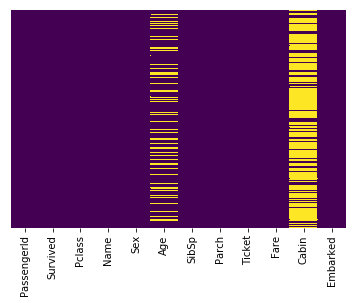

In [12]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [13]:
sns.set_style('whitegrid')

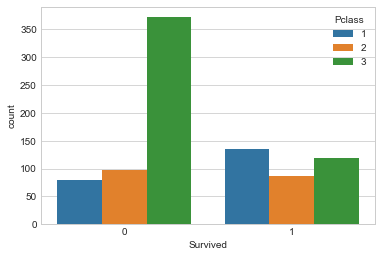

In [17]:
sns.countplot(train['Survived'],hue=train['Pclass'])

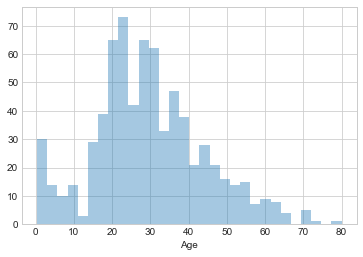

In [18]:
sns.distplot(train['Age'].dropna(),kde=False,bins=30)

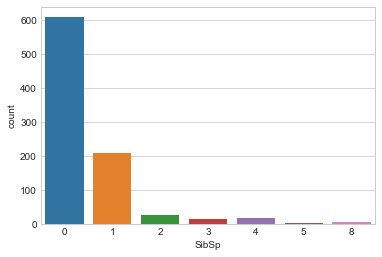

In [20]:
sns.countplot(x='SibSp',data=train)

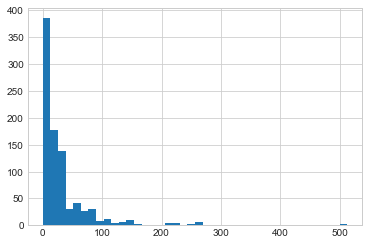

In [22]:
train['Fare'].hist(bins=40)

In [23]:
import cufflinks as cf
cf.go_offline()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [26]:
#train['Fare'].iplot(kind='hist')

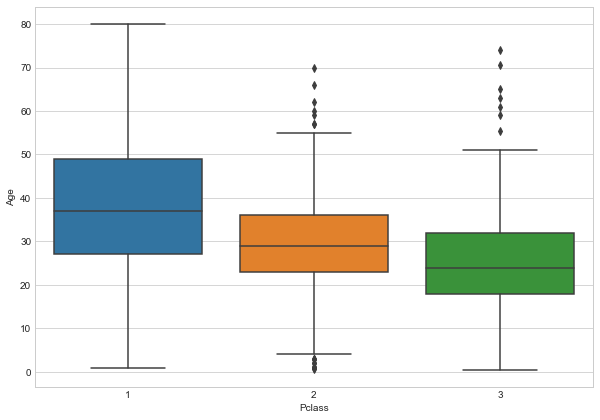

In [28]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train)

In [35]:
k= train[train['Pclass']==1]['Age'].mean()
a= train[train['Pclass']==2]['Age'].mean()
r= train[train['Pclass']==3]['Age'].mean()

In [38]:
def impute_age(cols):
    Age = cols[0]
    Pclass =cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return k
        elif Pclass == 2:
            return a 
        else:
            return r 
    else:
        return Age
        

In [39]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

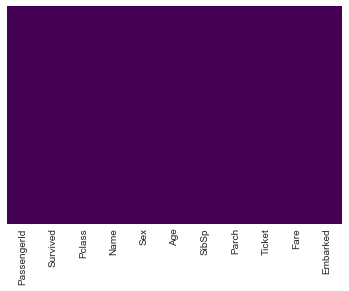

In [45]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [41]:
train.drop('Cabin',axis=1,inplace=True)

In [42]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [44]:
train.dropna(inplace=True)

In [48]:
sex= pd.get_dummies(train['Sex'],drop_first=True)

In [49]:
embarked = pd.get_dummies(train['Embarked'],drop_first=True)

In [50]:
embarked

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
5,1,0
6,0,1
7,0,1
8,0,1
9,0,0


In [51]:
train = pd.concat([train,sex,embarked],axis=1)

In [52]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [54]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [55]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [56]:
train.drop('PassengerId',axis=1,inplace=True)

In [57]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [58]:
pclass = pd.get_dummies(train['Pclass'],drop_first=True)

In [74]:
train = pd.concat([train,pclass],axis=1)

In [75]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,3,22.0,1,0,7.2500,1,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,1
3,1,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,3,35.0,0,0,8.0500,1,0,1,0,1


In [76]:
train.drop('Pclass',axis=1,inplace=True)

In [77]:
train.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [78]:
train.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S', 2, 3], dtype='object')

In [99]:
X= train.drop(['Survived'],axis=1)
y= train['Survived']

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [101]:
from sklearn.linear_model import LogisticRegression

In [102]:
logmodel =LogisticRegression()

In [103]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [104]:
predictions =logmodel.predict(X_test)

In [105]:
from sklearn.metrics import classification_report

In [106]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.79      0.92      0.85       107
          1       0.83      0.63      0.72        71

avg / total       0.81      0.80      0.80       178



In [107]:
from sklearn.metrics import confusion_matrix

In [108]:
confusion_matrix(y_test,predictions)

array([[98,  9],
       [26, 45]], dtype=int64)